In [1]:
import yfinance as yf
import pandas as pd

# List of solar companies
companies = ['FSLR', 'SPWR', 'ENPH', 'SEDG', 'CSIQ']  # Add more tickers as needed

# Fetch data for each company
stock_data = {}
for company in companies:
    stock_data[company] = yf.download(company, start='2015-01-01', end='2025-01-01')

# Combine data into a single DataFrame
all_stocks = pd.concat(
    [df.assign(company=company) for company, df in stock_data.items()],
    axis=0
).reset_index()

# Save to CSV for inspection
all_stocks.to_csv('stock_data.csv', index=False)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPWR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
import yfinance as yf
import pandas as pd

# Load valid companies
valid_companies = pd.read_csv("valid_companies_expanded.csv")["Company"].tolist()

# Initialize an empty list to store data
all_data = []

# Fetch data for each valid company
for company in valid_companies:
    try:
        data = yf.download(company, start="2015-01-01", end="2025-01-12", progress=False)
        data['Company'] = company  # Add company name as a column
        all_data.append(data)
    except Exception as e:
        print(f"Failed to fetch data for {company}: {e}")

# Combine all data into a single DataFrame
combined_data = pd.concat(all_data)

# Reset the index
combined_data.reset_index(inplace=True)

# Save combined raw data to CSV
combined_data.to_csv("raw_stock_data.csv", index=False)
print("Raw stock data saved as 'raw_stock_data.csv'.")



Raw stock data saved as 'raw_stock_data.csv'.


In [41]:
# Load the raw data
data = pd.read_csv("raw_stock_data.csv")

# Inspect the data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23203 entries, 0 to 23202
Data columns (total 52 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      23202 non-null  object
 1   Close     2523 non-null   object
 2   High      2523 non-null   object
 3   Low       2523 non-null   object
 4   Open      2523 non-null   object
 5   Volume    2523 non-null   object
 6   Company   23202 non-null  object
 7   Close.1   2523 non-null   object
 8   High.1    2523 non-null   object
 9   Low.1     2523 non-null   object
 10  Open.1    2523 non-null   object
 11  Volume.1  2523 non-null   object
 12  Close.2   2466 non-null   object
 13  High.2    2466 non-null   object
 14  Low.2     2466 non-null   object
 15  Open.2    2466 non-null   object
 16  Volume.2  2466 non-null   object
 17  Close.3   2523 non-null   object
 18  High.3    2523 non-null   object
 19  Low.3     2523 non-null   object
 20  Open.3    2523 non-null   object
 21  Volume.3  25

<ipython-input-41-5f1037510656>:2: DtypeWarning:

Columns (1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.



In [42]:
import pandas as pd

# Load the raw data
data = pd.read_csv("raw_stock_data.csv")

# Step 1: Extract column groups for each company based on patterns
company_columns = ['Close', 'High', 'Low', 'Open', 'Volume']
all_columns = [col for col in data.columns if any(col.startswith(var) for var in company_columns)]

# Step 2: Identify companies from the column groups
companies = ['FSLR', 'ENPH', 'SEDG', 'CSIQ', 'RUN', 'JKS', 'NEE', 'TPIC', 'ORA', 'MAXN']

# Step 3: Restructure data into tidy format
tidy_data = []

for i, company in enumerate(companies):
    # Extract columns for this company
    company_data = data[['Date'] + [f"{col}.{i}" if i > 0 else col for col in company_columns]].copy()

    # Rename columns to standard format
    company_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

    # Add the company name
    company_data['Company'] = company

    # Append to tidy data list
    tidy_data.append(company_data)

# Combine all company data into one DataFrame
tidy_data = pd.concat(tidy_data, ignore_index=True)

# Step 4: Handle missing values and data types
tidy_data['Date'] = pd.to_datetime(tidy_data['Date'], errors='coerce')
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    tidy_data[col] = pd.to_numeric(tidy_data[col], errors='coerce')

tidy_data = tidy_data.dropna(subset=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])

# Save the cleaned data
tidy_data.to_csv("cleaned_stock_data.csv", index=False)
print("Cleaned data saved as 'cleaned_stock_data.csv'.")


<ipython-input-42-d3b19996453a>:4: DtypeWarning:

Columns (1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.



Cleaned data saved as 'cleaned_stock_data.csv'.


In [44]:
print(tidy_data.head())
tidy_data.info()

        Date      Close       High        Low       Open     Volume Company
1 2015-01-02  44.549999  45.340000  43.720001  44.720001  1873800.0    FSLR
2 2015-01-05  41.830002  43.980000  41.509998  43.880001  3668000.0    FSLR
3 2015-01-06  40.860001  42.009998  39.880001  42.009998  3712200.0    FSLR
4 2015-01-07  41.750000  42.470001  41.400002  42.000000  2869800.0    FSLR
5 2015-01-08  43.630001  43.680000  42.029999  42.389999  3205400.0    FSLR
<class 'pandas.core.frame.DataFrame'>
Index: 23202 entries, 1 to 232029
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     23202 non-null  datetime64[ns]
 1   Close    23202 non-null  float64       
 2   High     23202 non-null  float64       
 3   Low      23202 non-null  float64       
 4   Open     23202 non-null  float64       
 5   Volume   23202 non-null  float64       
 6   Company  23202 non-null  object        
dtypes: datetime64[ns](1), float64(

In [45]:
# Calculate 7-day rolling average for Close prices
tidy_data['7-Day Rolling Avg'] = tidy_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=7).mean())

# Calculate rolling averages for other metrics if needed
tidy_data['7-Day Open Avg'] = tidy_data.groupby('Company')['Open'].transform(lambda x: x.rolling(window=7).mean())
tidy_data['7-Day Volume Avg'] = tidy_data.groupby('Company')['Volume'].transform(lambda x: x.rolling(window=7).mean())


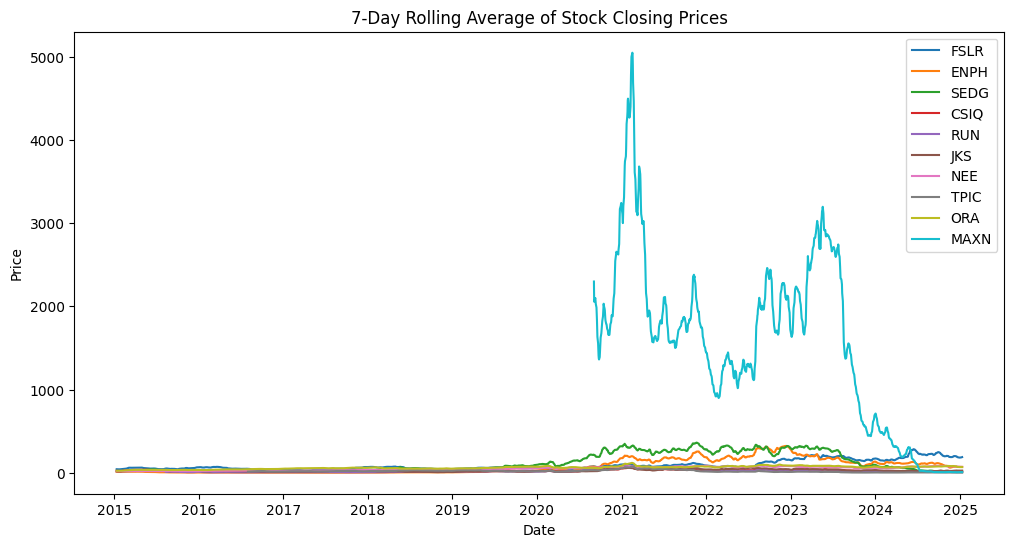

In [46]:
import matplotlib.pyplot as plt

# Plot rolling averages for each company
plt.figure(figsize=(12, 6))
for company in tidy_data['Company'].unique():
    subset = tidy_data[tidy_data['Company'] == company]
    plt.plot(subset['Date'], subset['7-Day Rolling Avg'], label=company)

plt.title('7-Day Rolling Average of Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


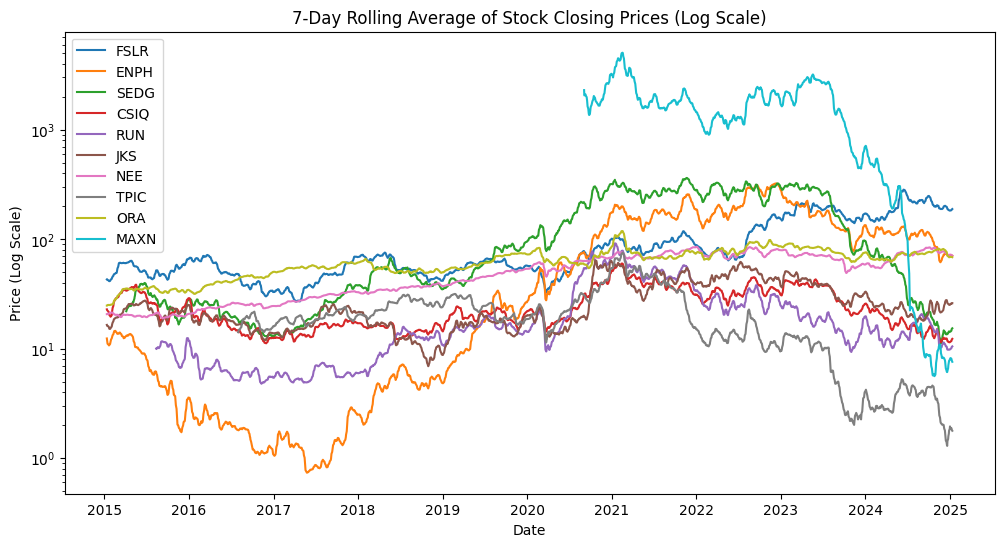

In [47]:
plt.figure(figsize=(12, 6))
for company in tidy_data['Company'].unique():
    subset = tidy_data[tidy_data['Company'] == company]
    plt.plot(subset['Date'], subset['7-Day Rolling Avg'], label=company)

plt.yscale('log')  # Apply logarithmic scale
plt.title('7-Day Rolling Average of Stock Closing Prices (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Price (Log Scale)')
plt.legend()
plt.show()


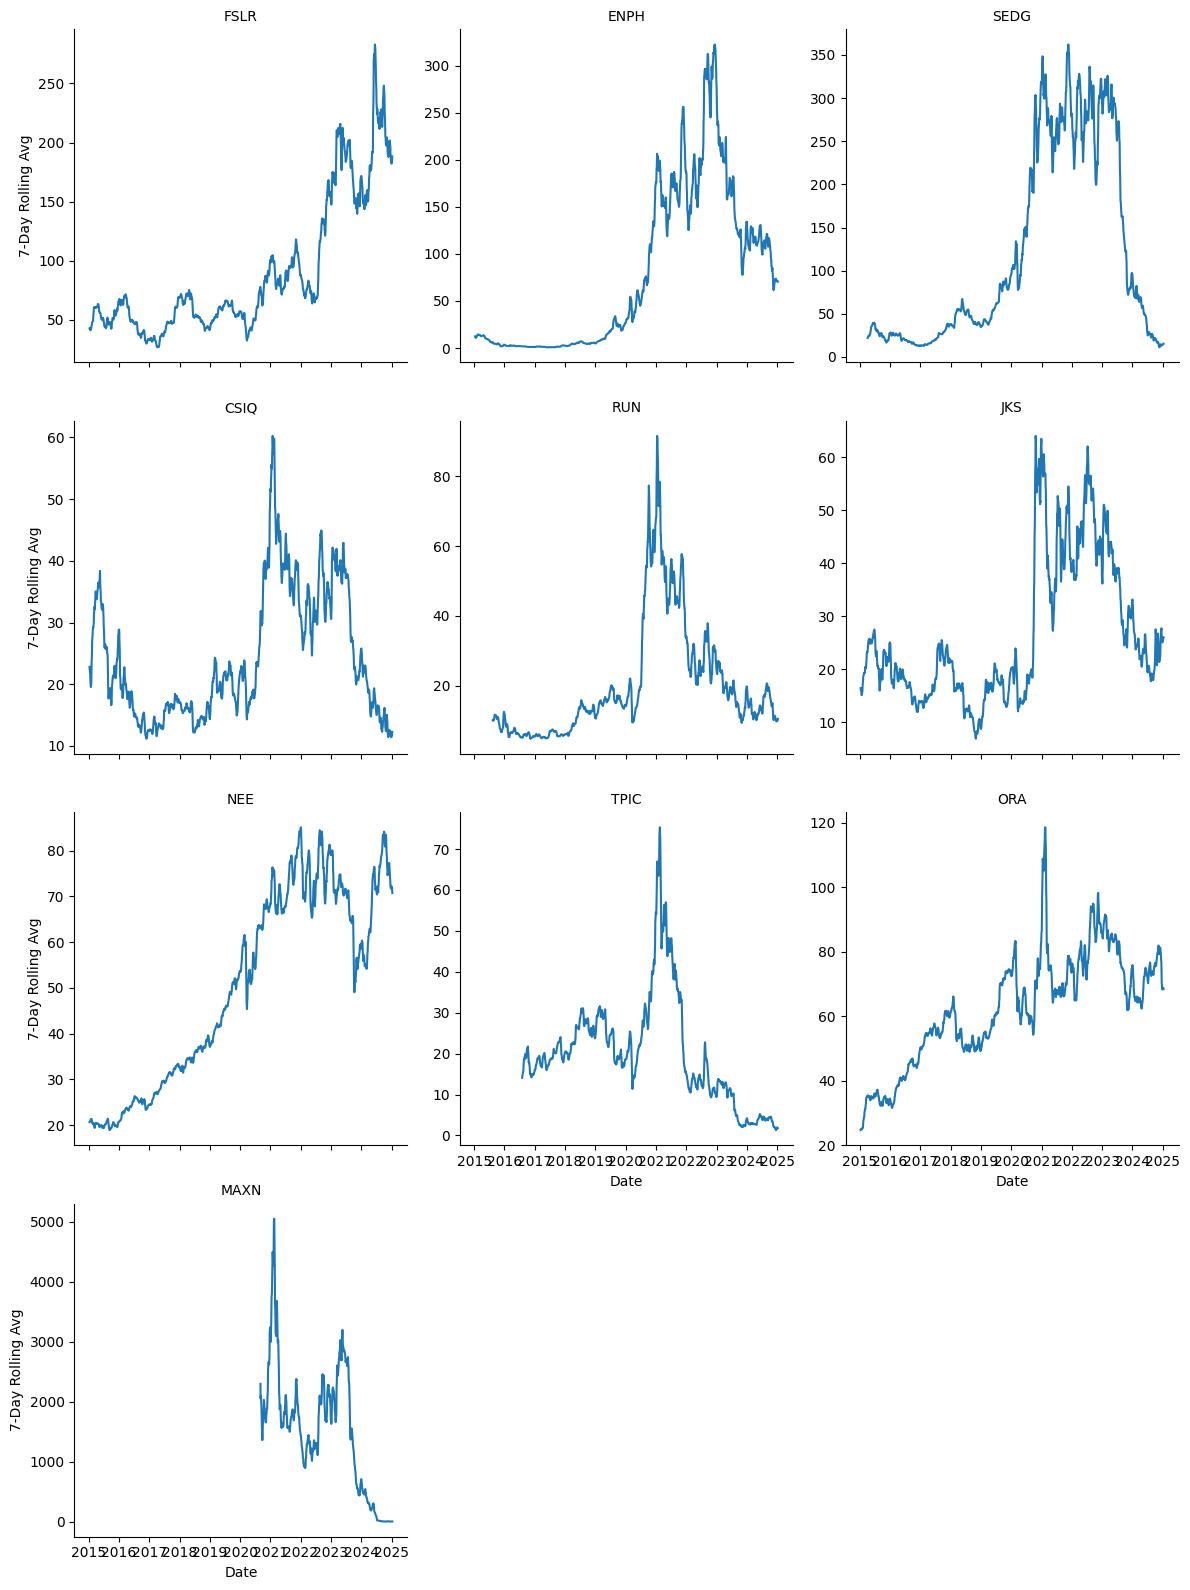

In [48]:
import seaborn as sns

# Create separate plots for each company
g = sns.FacetGrid(tidy_data, col="Company", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="Date", y="7-Day Rolling Avg")
g.set_titles("{col_name}")
g.set_axis_labels("Date", "7-Day Rolling Avg")
plt.show()


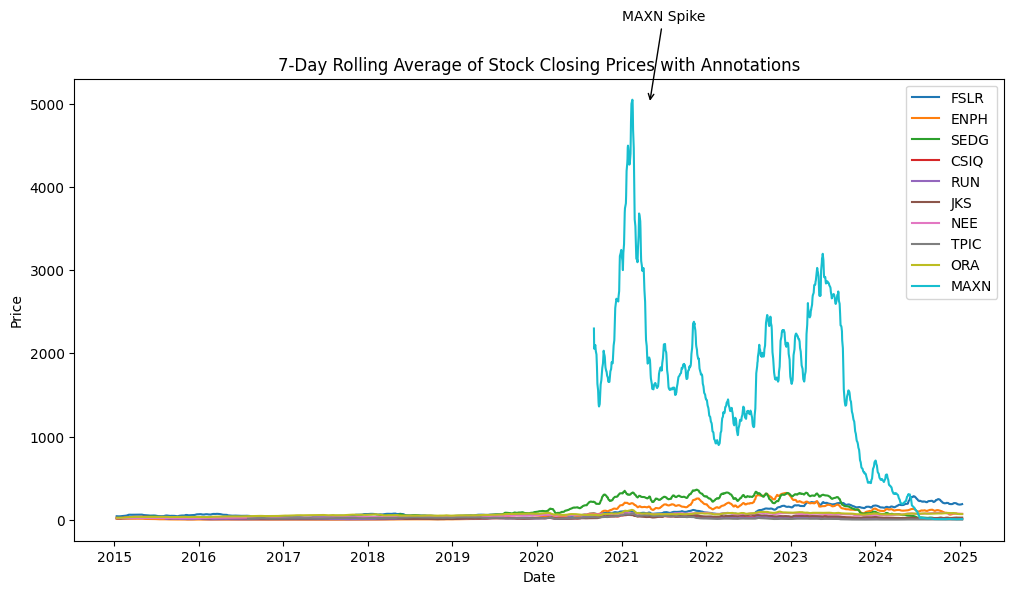

In [50]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
for company in tidy_data['Company'].unique():
    subset = tidy_data[tidy_data['Company'] == company]
    plt.plot(subset['Date'], subset['7-Day Rolling Avg'], label=company)

# Annotate with valid datetime object
plt.annotate(
    'MAXN Spike',
    xy=(pd.Timestamp('2021-05-01'), 5000),  # Correct datetime object
    xytext=(pd.Timestamp('2021-01-01'), 6000),  # Correct datetime object
    arrowprops=dict(facecolor='black', arrowstyle='->')
)

# Add labels and legend
plt.title('7-Day Rolling Average of Stock Closing Prices with Annotations')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



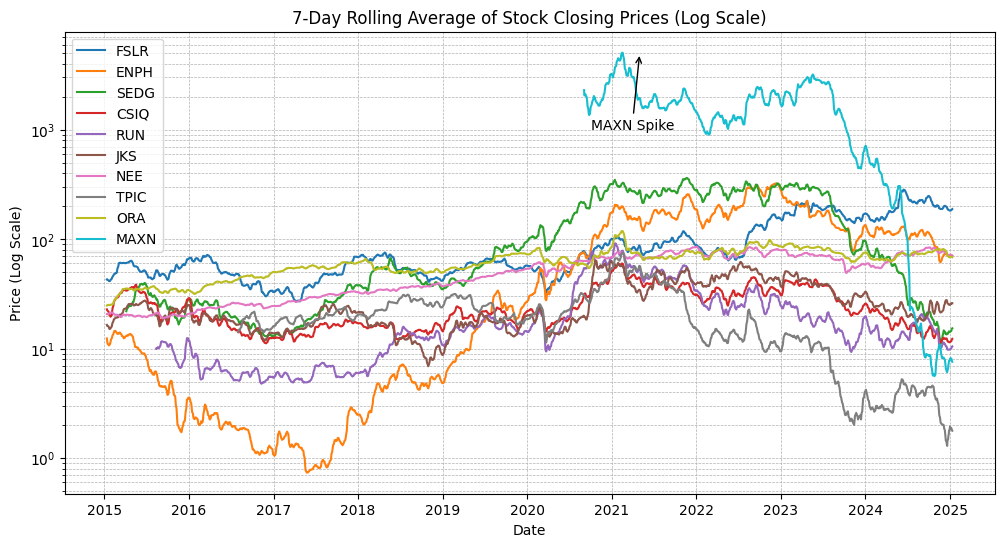

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot with log scale
plt.figure(figsize=(12, 6))

# Plot each company's rolling average
for company in tidy_data['Company'].unique():
    subset = tidy_data[tidy_data['Company'] == company]
    plt.plot(subset['Date'], subset['7-Day Rolling Avg'], label=company)

# Apply log scale to y-axis
plt.yscale('log')

# Annotate specific points (example for MAXN spike)
plt.annotate(
    'MAXN Spike',
    xy=(pd.Timestamp('2021-05-01'), 5000),  # Use correct datetime object for x-axis
    xytext=(pd.Timestamp('2020-10-01'), 1000),  # Adjust xytext for better placement
    arrowprops=dict(facecolor='black', arrowstyle='->')
)

# Add labels, legend, and title
plt.title('7-Day Rolling Average of Stock Closing Prices (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Price (Log Scale)')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Add grid for better readability
plt.show()
